In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
df = pd.read_csv('data.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [5]:
x = df[(df.location=='Argentina-Catamarca') & (df.data_field_code=='AR0005')]

In [6]:
x = x['value']

In [7]:
xPlot = x.values

In [8]:
y = df[(df.location=='Argentina-Catamarca') & (df.data_field_code=='AR0005')]

In [9]:
y = y['report_date']

In [10]:
yPlot = y.values

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

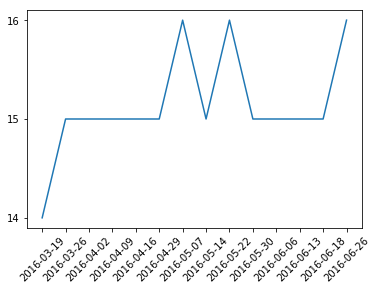

In [11]:
plt.plot(yPlot,xPlot)
plt.xticks(rotation=45)

# 2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.

In [12]:
x = df[(df.location=='Argentina-CABA') & (df.unit =='cases')]

In [13]:
x[['value']] = (pd.to_numeric(x.value))

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
x = x.groupby('report_date').sum()

In [15]:
x= x.drop(['time_period','time_period_type'],axis =1)

In [16]:
y = df[(df.location=='Argentina-Catamarca') & (df.unit =='cases')]

In [17]:
y[['value']] = (pd.to_numeric(y.value))

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
y = y.groupby('report_date').sum()

In [19]:
y = y.drop(['time_period','time_period_type'],axis =1)

In [20]:
ans = y;

In [21]:
ans.rename(columns={'value':'Argentina-Catamarca'},inplace = True)

In [22]:
ans[['Argentina-CABA']] = x[['value']]

Text(0, 0.5, 'Values')

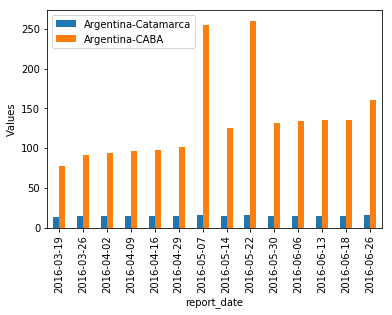

In [23]:
ans.plot(kind = 'bar')
plt.ylabel('Values')

# 3 Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [24]:
temp1 = df[df.location=='Argentina-Buenos_Aires']

In [25]:
temp1[['value']] = (pd.to_numeric(temp1.value))

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
 temp1.drop(['time_period','time_period_type','unit','data_field_code','location_type'],axis =1,inplace = True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
temp1 =temp1.groupby('data_field').sum()

In [28]:
temp2 = df[df.location=='Argentina-CABA']

In [29]:
temp2[['value']] = (pd.to_numeric(temp2.value))

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
 temp2.drop(['time_period','time_period_type','unit','data_field_code','location_type'],axis =1,inplace = True)

In [31]:
temp2 =temp2.groupby('data_field').sum()

In [32]:
temp3 = df[df.location=='Argentina-Catamarca']

In [33]:
temp3[['value']] = (pd.to_numeric(temp3.value))

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
temp3.drop(['time_period','time_period_type','unit','data_field_code','location_type'],axis =1,inplace = True)

In [35]:
temp3 =temp3.groupby('data_field').sum()

In [36]:
ans1 = temp1

In [37]:
ans1.rename(columns={'value':'Argentina-Buenos_Aires'},inplace = True)

In [38]:
ans1[['Argentina-CABA']] = temp2[['value']]

In [39]:
ans1[['Argentina-Catamarca']]= temp3[['value']]

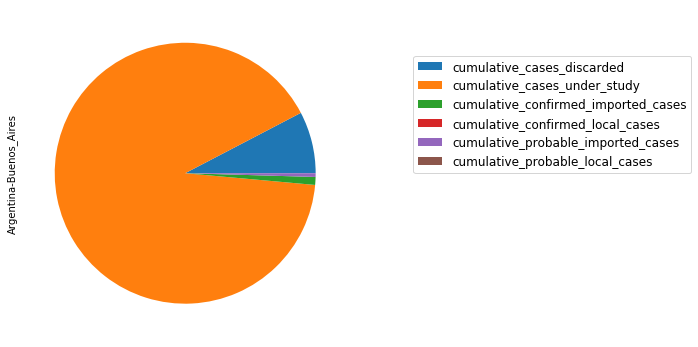

In [40]:
plt.figure(figsize=(6,6))
ans1['Argentina-Buenos_Aires'].plot(kind='pie',labels=None)
plt.legend(ans1.index,loc=(1.2,0.5),fontsize = 'large')

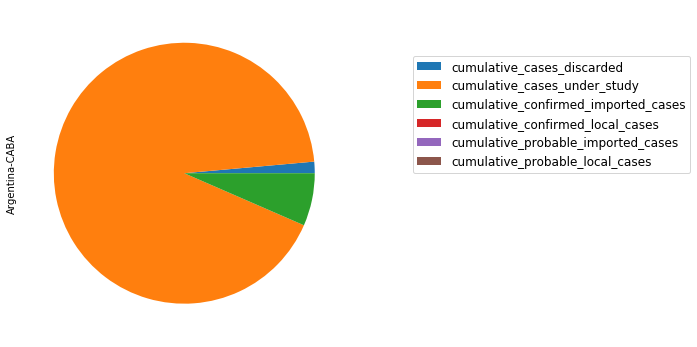

In [41]:
plt.figure(figsize=(6,6))
ans1['Argentina-CABA'].plot(kind='pie',labels=None)
plt.legend(ans1.index,loc=(1.2,0.5),fontsize = 'large')

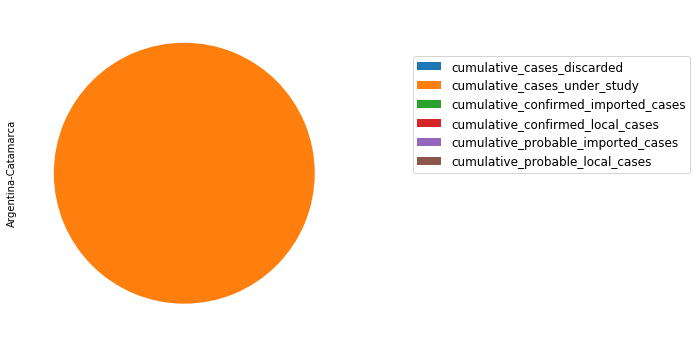

In [42]:
plt.figure(figsize=(6,6))
ans1['Argentina-Catamarca'].plot(kind='pie',labels=None)
plt.legend(ans1.index,loc=(1.2,0.5),fontsize = 'large')

Text(0, 0.5, 'Values')

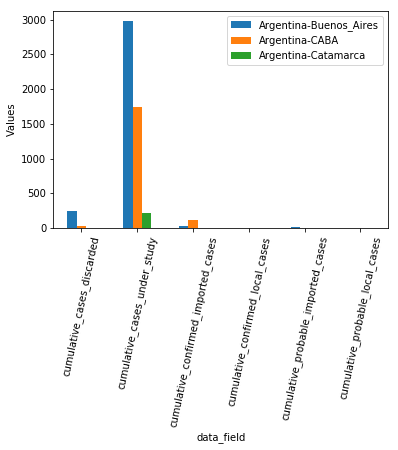

In [43]:
ans1.plot(kind= 'bar',rot = 78)
plt.ylabel('Values')

# 4.Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good

In [44]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))



In [45]:
s = input("Enter the word: ")
print(correction(s))

Enter the word: speling
spelling
